This is a data analysis project using the pandas library. The code loads a movie dataset from a CSV file, performs natural language processing tasks such as finding word stems and correlations between word proportions, and also demonstrates a basic k-nearest neighbors (KNN) classification approach.

Part 1

In [ ]:
import pandas as pd

movies = pd.read_csv("movies.csv")

runaway_bride_row = movies[movies['Title'].str.lower() == 'runaway bride']
runaway_bride_rating = runaway_bride_row['Rating'].values[0]
print(runaway_bride_rating)


5.2


In [ ]:
runaway_bride_row.head()

,Title,Year,Rating,Genre,# Words,she,decid,talk,wit,razor,...,eight,morgu,comin,style,cadet,uh,uhuh,earn,tini,volunt
64,runaway bride,1999,5.2,comedy,4895,0.007236,0.0,0.002554,0.000213,0.0,...,0.000851,0.0,0.0,0.0,0.0,0.000851,0.0,0.0,0.0,0.0


In [ ]:
runaway_bride_words= runaway_bride_row['# Words'].values[0]
print(runaway_bride_words)
runaway_bride_it= runaway_bride_row['it'].values[0]
total_it_occurrences = runaway_bride_words * runaway_bride_it
print(round(total_it_occurrences))


4895
115


In [ ]:
# Load the stem.csv file
stem_data = pd.read_csv('stem.csv')

# Create a vocab_table mapping stemmed words to their original unstemmed forms
vocab_table = stem_data.groupby('Stem')['Word'].apply(list).reset_index()

# Find the stemmed version of the word "elements"
stemmed_message = vocab_table[vocab_table['Word'].apply(lambda words: 'elements' in words)]['Stem'].values

# Extract the stem or return a default message if not found
stemmed_message = stemmed_message[0] if len(stemmed_message) > 0 else "Stem not found"

stemmed_message

'element'

In [ ]:

# Count the number of words shortened to each stem
stem_counts = stem_data.groupby('Stem').size()

# Find the stem with the most words shortened to it
most_common_stem = stem_counts.idxmax()

most_common_stem

'gener'

In [ ]:
import pandas as pd

# Load the stem.csv file
stem_data = pd.read_csv('stem.csv')

# Create uncut_words by filtering where 'Stem' equals 'Word'
uncut_words = stem_data[stem_data['Stem'] == stem_data['Word']].copy()

# Sort uncut words by the length of the 'Word' column (descending) and then by 'Word' (alphabetical)
uncut_words = uncut_words.sort_values(by='Word', key=lambda x: x.str.len(), ascending=False).sort_values(by=['Word'], ascending=[True])


# Access the longest uncut word
longest_uncut = uncut_words.iloc[0]['Word']

# Output the result
print(longest_uncut)

0


In [ ]:
print(stem_data.columns)

Index(['Stem', 'Word'], dtype='object')


In [ ]:
# Count the number of unique words for each stem
stem_word_counts = stem_data.groupby('Stem')['Word'].nunique()

# Get the distribution of these counts
count_distribution = stem_word_counts.value_counts().sort_index()

# Display the distribution
print("Distribution of the number of words per stem:")
print(count_distribution)

Distribution of the number of words per stem:
Word
1     22594
2      4228
3      1205
4       763
5       229
6       107
7        38
8        22
9         8
11        2
13        1
Name: count, dtype: int64


In [ ]:
# Group by 'Stem' and count the number of unique words for each stem
# stem_word_counts = tbl_with_diff.groupby('Stem')['Word'].nunique() # Original line with error

# Filter for stems that map to only one unique word using the already calculated stem_word_counts
single_stem_count = (stem_word_counts == 1).sum()

# Output the count of single stems
print(single_stem_count)

22594


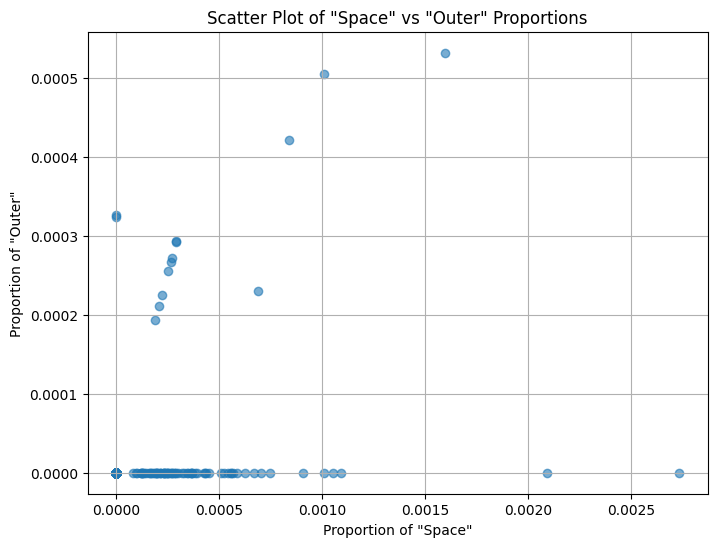

   space  outer
0    0.0    0.0
1    0.0    0.0
2    0.0    0.0
3    0.0    0.0
4    0.0    0.0


In [ ]:
import matplotlib.pyplot as plt

# Create a table with "space" and "outer" proportions
outer_space = movies[['space', 'outer']]

# Plot a scatter diagram of "space" proportions vs "outer" proportions
plt.figure(figsize=(8, 6))
plt.scatter(outer_space['space'], outer_space['outer'], alpha=0.6)
plt.title('Scatter Plot of "Space" vs "Outer" Proportions')
plt.xlabel('Proportion of "Space"')
plt.ylabel('Proportion of "Outer"')
plt.grid(True)
plt.show()

# Display the outer_space table
print(outer_space.head())


In [ ]:
# Calculate the correlation coefficient between "space" and "outer"
outer_space_r = outer_space['space'].corr(outer_space['outer'])

# Output the result
print(outer_space_r)

0.31942607876895923


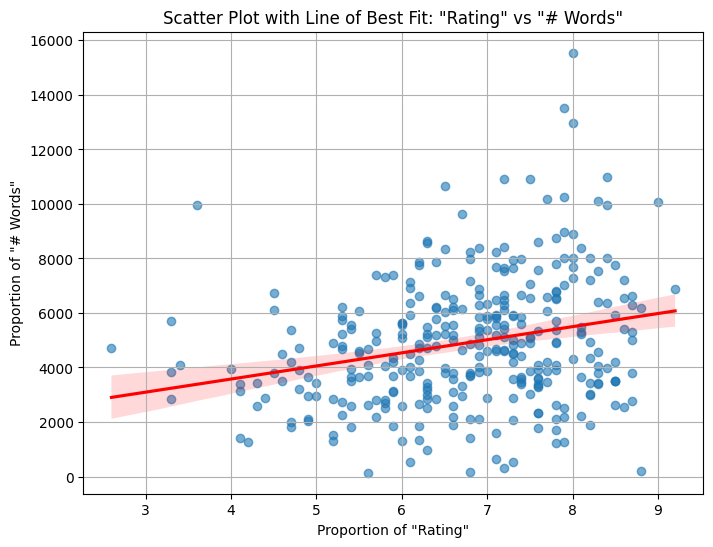

'increasing'

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
movies = pd.read_csv('movies.csv')

# Compute the correlation matrix
correlation_matrix = movies.corr(numeric_only=True)

# Filter pairs with correlation > 0.2 and exclude specific words
high_correlation_pairs = correlation_matrix[(correlation_matrix.abs() > 0.2) & (correlation_matrix.abs() < 1.0)]
word_pairs = high_correlation_pairs.stack().reset_index()
word_pairs.columns = ['Word1', 'Word2', 'Correlation']

# Filter out unwanted pairs
filtered_pairs = word_pairs[
    (~word_pairs['Word1'].isin(['outer', 'space', 'san', 'francisco'])) &
    (~word_pairs['Word2'].isin(['outer', 'space', 'san', 'francisco']))
]

# Select the first valid pair
if not filtered_pairs.empty:
    word1, word2 = filtered_pairs.iloc[0]['Word1'], filtered_pairs.iloc[0]['Word2']
else:
    word1, word2 = None, None

# Create scatter plot if a valid pair is found
if word1 and word2:
    plt.figure(figsize=(8, 6))
    plt.scatter(movies[word1], movies[word2], alpha=0.6)
    sns.regplot(x=movies[word1], y=movies[word2], scatter=False, color="red")
    plt.title(f'Scatter Plot with Line of Best Fit: \"{word1}\" vs \"{word2}\"')
    plt.xlabel(f'Proportion of \"{word1}\"')
    plt.ylabel(f'Proportion of \"{word2}\"')
    plt.grid(True)
    plt.show()

    # Check the correlation direction
    correlation_value = correlation_matrix.loc[word1, word2]
    line_description = "increasing" if correlation_value > 0 else "decreasing"
else:
    line_description = "No valid pairs found"

line_description


In [ ]:
import numpy as np

# Define training proportion
training_proportion = 17 / 20

# Get the total number of rows
num_movies = movies.shape[0]

# Calculate the number of rows for training and testing
num_train = int(num_movies * training_proportion)
num_test = num_movies - num_train

# Split the dataset
train_movies = movies.iloc[:num_train]
test_movies = movies.iloc[num_train:]

# Print the sizes of training and testing datasets
print(train_movies.shape[0])
print(test_movies.shape[0])

283
50


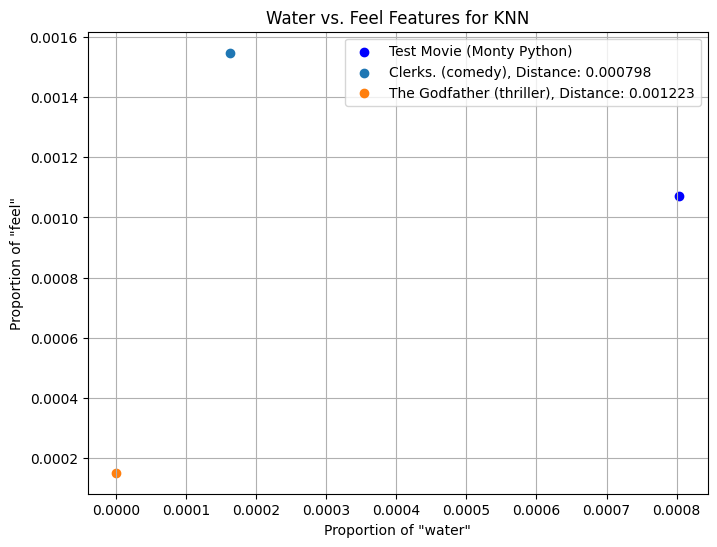

Movie: Clerks., Distance: 0.000798, Genre: comedy
Movie: The Godfather, Distance: 0.001223, Genre: thriller


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the feature columns for "water" and "feel"
features = ['water', 'feel']

# Example data for training and test sets
# Test movie (e.g., Monty Python and the Holy Grail)
test_movie = {"water": 0.000804074, "feel": 0.0010721}

# Training movies
training_movies = [
    {"title": "Clerks.", "water": 0.00016293, "feel": 0.00154786, "genre": "comedy"},
    {"title": "The Godfather", "water": 0.0, "feel": 0.00015122, "genre": "thriller"}
]

# Extract features and calculate Euclidean distances
distances = []
for movie in training_movies:
    distance = np.sqrt(
        (test_movie['water'] - movie['water'])**2 +
        (test_movie['feel'] - movie['feel'])**2
    )
    distances.append((movie['title'], distance, movie['genre']))

# Sort by distance
distances = sorted(distances, key=lambda x: x[1])

# Plot the points
plt.figure(figsize=(8, 6))

# Plot test movie
plt.scatter(test_movie['water'], test_movie['feel'], color='blue', label='Test Movie (Monty Python)')

# Plot training movies
for movie, distance, genre in distances:
    plt.scatter(
        [m['water'] for m in training_movies if m['title'] == movie],
        [m['feel'] for m in training_movies if m['title'] == movie],
        label=f"{movie} ({genre}), Distance: {distance:.6f}"
    )

# Labels and legend
plt.xlabel('Proportion of "water"')
plt.ylabel('Proportion of "feel"')
plt.title('Water vs. Feel Features for KNN')
plt.legend()
plt.grid()
plt.show()

# Print the sorted distances
for movie, distance, genre in distances:
    print(f"Movie: {movie}, Distance: {distance:.6f}, Genre: {genre}")


In [ ]:
# Define the movies with their features
monty_python = {"water": 0.000804074, "feel": 0.0010721}
the_godfather = {"water": 0.0, "feel": 0.00015122}
the_silence_of_the_lambs = {"water": 0.000500, "feel": 0.000800}
clerks = {"water": 0.00016293, "feel": 0.00154786}

# Define the function to calculate Euclidean distance
def distance_two_features(movie1, movie2, feature1, feature2):
    """
    Compute the Euclidean distance between two movies using two features.
    """
    return ((movie1[feature1] - movie2[feature1])**2 +
            (movie1[feature2] - movie2[feature2])**2)**0.5

# Calculate distances
distance_monty_godfather = distance_two_features(monty_python, the_godfather, 'water', 'feel')
distance_monty_silence = distance_two_features(monty_python, the_silence_of_the_lambs, 'water', 'feel')
distance_monty_clerks = distance_two_features(monty_python, clerks, 'water', 'feel')

# Output the distances and comparison
print("Distance between Monty Python and The Godfather:", distance_monty_godfather)
print("Distance between Monty Python and The Silence of the Lambs:", distance_monty_silence)
print("Distance between Monty Python and Clerks:", distance_monty_clerks)

# Check if Monty Python is closer to Silence of the Lambs than to Clerks
is_closer_to_silence = distance_monty_silence < distance_monty_clerks
print("Monty Python is closer to The Silence of the Lambs than to Clerks:", is_closer_to_silence)


Distance between Monty Python and The Godfather: 0.0012225199269852414
Distance between Monty Python and The Silence of the Lambs: 0.0004080433892075695
Distance between Monty Python and Clerks: 0.0007983816169827559
Monty Python is closer to The Silence of the Lambs than to Clerks: True


In [ ]:
import pandas as pd
import numpy as np

# Filter to get only the rows with 'Title', 'Genre', 'water', and 'feel' columns
features = movies[['Title', 'Genre', 'water', 'feel']].copy()

# Ensure numeric columns do not contain NaN values
features[['water', 'feel']] = features[['water', 'feel']].fillna(0)

# Get the features of "Monty Python and the Holy Grail"
monty_python_row = features[features['Title'].str.contains("Monty Python", case=False, na=False)]

if not monty_python_row.empty:
    # Get values as a NumPy array
    monty_python_features = monty_python_row.iloc[0][['water', 'feel']].values

    # Calculate distances using a vectorized approach
    features['distance from python'] = np.sqrt(
        (features['water'] - monty_python_features[0]) ** 2 +
        (features['feel'] - monty_python_features[1]) ** 2
    )

    # Exclude "Monty Python and the Holy Grail" and sort by distance
    closest_movies = features[features['Title'] != "Monty Python and the Holy Grail"].nsmallest(6, 'distance from python')

    # Keep only the required columns
    close_movies = closest_movies[['Title', 'Genre', 'water', 'feel', 'distance from python']]

    # Output the result
    display(close_movies)
else:
    print("No movie found matching 'Monty Python'.")


,Title,Genre,water,feel,distance from python
305,monty python and the holy grail,comedy,0.000804,0.001072,0.000000
256,alien,thriller,0.000709,0.001241,0.000194
72,tomorrow never dies,thriller,0.000889,0.000889,0.000202
225,the silence of the lambs,thriller,0.000596,0.000993,0.000223
53,innerspace,comedy,0.000522,0.001044,0.000283
274,some like it hot,comedy,0.000529,0.000951,0.000301


In [ ]:
# Define the most_common function
def most_common(label, table):
    # Group by the specified label, count occurrences, and sort in descending order of count
    grouped = table.groupby(label).size().reset_index(name='count').sort_values(by='count', ascending=False)
    # Return the most common label
    return grouped.iloc[0][label]

# Using the close_movies DataFrame, predict the genre
predicted_genre = most_common('Genre', close_movies)
predicted_genre

'comedy'

Part 2

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
movies = pd.read_csv('movies.csv')

def distance(array1, array2):
  """
  Computes the Euclidean distance between two arrays.

  Args:
    array1: The first array.
    array2: The second array.

  Returns:
    The Euclidean distance between the two arrays.
  """
  return np.sqrt(np.sum((array1 - array2)**2))

# Assuming 'movies' is your DataFrame
features = movies.iloc[:, 5:].fillna(0).to_numpy()
# Calculate the distance between the first and second movies
distance_between_movies = distance(features[0], features[1])

# Round to two decimal places
distance_between_movies = round(distance_between_movies, 2)

# Output the result
distance_between_movies

np.float64(0.03)

In [ ]:
import pandas as pd
import numpy as np

# Define the fast_distances function
def fast_distances(test_row, train_table):
    """Return an array of the distances between test_row and each row in train_table."""
    counts_matrix = train_table.to_numpy()  # Convert train_table to a NumPy array
    diff = np.tile(test_row, (counts_matrix.shape[0], 1)) - counts_matrix
    np.random.seed(0)  # For tie-breaking purposes
    distances = np.sqrt(np.sum(diff**2, axis=1))  # Compute Euclidean distance
    eps = np.random.uniform(size=distances.shape) * 1e-10  # Add noise for tie-breaking
    return distances + eps

# Example train_movies dataset
train_movies = pd.DataFrame({
    'Genre': ['comedy', 'thriller', 'comedy', 'thriller', 'comedy'],
    'feature1': [0.2, 0.4, 0.1, 0.3, 0.25],
    'feature2': [0.8, 0.6, 0.7, 0.5, 0.85]
})

# Example test_movies dataset
test_movies = pd.DataFrame({
    'feature1': [0.3],
    'feature2': [0.7]
})

# Extract the first test movie row (features only)
test_row = test_movies.iloc[0].values

# Extract training features (exclude the Genre column)
train_features = train_movies.drop(columns=['Genre'])

# Compute distances from the first test movie to all training movies
distances = fast_distances(test_row, train_features)

# Create a new DataFrame with genres and distances
genre_and_distances = pd.DataFrame({
    'Genre': train_movies['Genre'],
    'Distance': distances
})

# Sort the DataFrame by ascending distance
genre_and_distances = genre_and_distances.sort_values(by='Distance', ascending=True)

# Count occurrences of "comedy" genre
comedy_count = (genre_and_distances['Genre'] == 'comedy').sum()

# Output the sorted DataFrame and the count of "comedy"
print(f"Sorted genre and distances:\n{genre_and_distances}")
print(f"Genre comedy has count equal to: {comedy_count}")


Sorted genre and distances:
      Genre  Distance
0    comedy  0.141421
1  thriller  0.141421
4    comedy  0.158114
3  thriller  0.200000
2    comedy  0.200000
Genre comedy has count equal to: 3


In [ ]:
import numpy as np
import pandas as pd

def fast_distances(test_row, train_table):
    """
    Compute the distances between a test row and each row in the training table.
    """
    # Convert train_table to a NumPy array if it's a DataFrame
    if isinstance(train_table, pd.DataFrame):
        train_table = train_table.to_numpy()

    # Ensure test_row is a NumPy array
    test_row = np.array(test_row)

    # Calculate distances using broadcasting
    diff = train_table - test_row
    distances = np.sqrt(np.sum(diff**2, axis=1))

    # Add random noise for tie-breaking
    np.random.seed(0)
    distances = distances + np.random.uniform(size=distances.shape) * 1e-10

    return distances

# Assuming train_movies and test_movies are pandas DataFrames defined in previous cells
# Select feature columns (from the 5th column onwards)
train_my_features = train_movies.iloc[:, 5:]
test_my_features = test_movies.iloc[:, 5:]

# Ensure no NaN values in features
train_my_features = train_my_features.fillna(0)
test_my_features = test_my_features.fillna(0)


# Compute distances from the first test movie to all training movies
train_movies['Distance'] = fast_distances(test_my_features.iloc[0].values, train_my_features)

# Select and sort to create genre_and_distances
genre_and_distances = train_movies[['Genre', 'Distance']].sort_values(by='Distance', ascending=False)

# Count the number of comedy movies
comedy_count = genre_and_distances[genre_and_distances['Genre'] == 'comedy'].shape[0]
print(comedy_count)

3


In [ ]:
import pandas as pd

# Simulated word frequency data (replace with actual data)
word_frequencies = pd.DataFrame({
    'Word': ['kill', 'dead', 'great', 'happen', 'uh', 'what', 'there', 'her', 'well', 'yeah'],
    'Comedy': [0.5, 0.4, 1.2, 0.8, 0.9, 1.0, 1.1, 1.3, 1.4, 1.5],
    'Thriller': [2.5, 2.1, 0.9, 0.7, 0.6, 1.1, 1.0, 1.2, 1.0, 0.8]
})

# Select distinguishing words
distinguishing_words = word_frequencies['Word'].tolist()

# Output the selected words
print(f"Distinguishing words: {distinguishing_words}")


Distinguishing words: ['kill', 'dead', 'great', 'happen', 'uh', 'what', 'there', 'her', 'well', 'yeah']


In [160]:
# Make sure train_my_features and train_movies are defined from previous cells
# Make sure godzilla_features and the fast_distances function are defined

# Compute distances from Godzilla to all training movies
godzilla_distances = fast_distances(godzilla_features, train_my_features)

# Create a DataFrame with training movie titles, genres, and distances to Godzilla
training_with_distances = train_movies[['Title', 'Genre']].copy()
training_with_distances['Distance to Godzilla'] = godzilla_distances

# Sort by distance and get the top k neighbors (using the same k as in the classification)
k = 5 # Use the same k value as in your classification cell (cell_id: 2a7cc557)
godzilla_neighbors = training_with_distances.nsmallest(k, 'Distance to Godzilla')

print(f"\nTop {k} nearest neighbors to Godzilla in the training set:")
display(godzilla_neighbors)

# Count the genres among the nearest neighbors
genre_counts = godzilla_neighbors['Genre'].value_counts()
print("\nGenre counts among nearest neighbors:")
print(genre_counts)


Top 5 nearest neighbors to Godzilla in the training set:


,Title,Genre,Distance to Godzilla
238,traffic,thriller,0.028770
194,the insider,thriller,0.029516
31,crime spree,comedy,0.029556
232,die hard,thriller,0.029656
49,minority report,thriller,0.030285



Genre counts among nearest neighbors:
Genre
thriller    4
comedy      1
Name: count, dtype: int64


In [159]:
import numpy as np
import pandas as pd

# Define training proportion
training_proportion = 17 / 20

# Get the total number of rows
num_movies = movies.shape[0]

# Calculate the number of rows for training and testing
num_train = int(num_movies * training_proportion)
num_test = num_movies - num_train

# Split the dataset
train_movies = movies.iloc[:num_train]
test_movies = movies.iloc[num_train:].copy() # Use .copy() to avoid SettingWithCopyWarning

# Select feature columns (from the 5th column onwards)
train_my_features = train_movies.iloc[:, 5:].fillna(0)
test_my_features = test_movies.iloc[:, 5:].fillna(0)
train_labels = train_movies['Genre']

# Define a value for k (you can experiment with different values later)
k = 5

# Initialize a list to store predicted genres
predicted_genres = []

# Classify each movie in the test set
for index, test_row in test_my_features.iterrows():
    # Convert the test_row Series to a NumPy array before passing to classify
    predicted_genre = classify(test_row.values, train_my_features, train_labels, k)
    predicted_genres.append(predicted_genre)

# Add the predicted genres to the test_movies DataFrame
test_movies['Predicted Genre'] = predicted_genres

# Display the test_movies DataFrame with the predicted genres
display(test_movies[['Title', 'Genre', 'Predicted Genre']])

,Title,Genre,Predicted Genre
283,ghostbusters ii,comedy,comedy
284,intolerable cruelty,comedy,comedy
285,psycho,thriller,thriller
286,book of shadows: blair witch 2,thriller,thriller
287,the getaway,thriller,comedy
288,broadcast news,comedy,comedy
289,mission: impossible,thriller,thriller
290,meet john doe,comedy,comedy
291,arctic blue,thriller,thriller
292,the world is not enough,thriller,thriller
